# K 近邻
### 物理类聚，人以群分
### 一种距离搜寻方法，距离度量
$$
L_p (x_i, x_j) = (\sum_{1=1}^{n} |x_i^{(l)} - x_j{(l)} | ^p)^{\frac 1 p}
$$
- 欧式距离 p = 2
- 曼哈顿距离 p = 1
- 切比雪夫距离 p = $\infty$

# 例3.1 已知二维空间3个点，$x_1=(1, 1)^T, x_2=(5, 1)^T, x_3=(4, 4)^T$, p取不同值时，$L_p$距离下距离$x_1$的最近邻点

In [3]:
import math
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def L(x, y, p=2):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

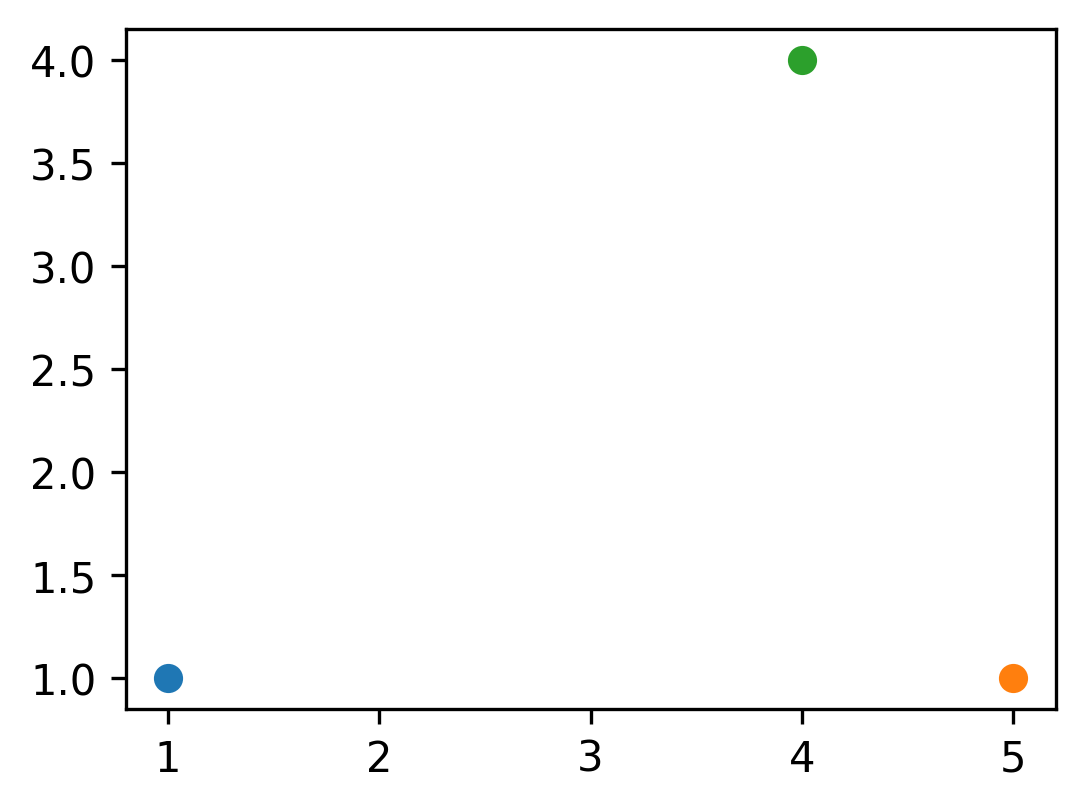

In [5]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

plt.figure(figsize=(4, 3), dpi = 300)
plt.scatter(x1[0], x1[1])
plt.scatter(x2[0], x2[1])
plt.scatter(x3[0], x3[1])
plt.show()

In [8]:
# k 近邻
for i in range(1, 5):
    r = {'x1 {}'.format(c): L(x1, c, p = i) for c in [x2, x3]}
    print('p = {}'.format(i), " ", r)
#     print(min(zip(r.values(), r.keys())))

p = 1   {'x1 [5, 1]': 4.0, 'x1 [4, 4]': 6.0}
p = 2   {'x1 [5, 1]': 4.0, 'x1 [4, 4]': 4.242640687119285}
p = 3   {'x1 [5, 1]': 3.9999999999999996, 'x1 [4, 4]': 3.7797631496846193}
p = 4   {'x1 [5, 1]': 4.0, 'x1 [4, 4]': 3.5676213450081633}


# Kd tree kd树

In [9]:
import math
from collections import namedtuple

import matplotlib.pyplot as plt

In [13]:
# kd 树 Node 数据结构
class KdNode(object):
    def __init__(self, dom_ele, split, left, right):
        self.dom_ele = dom_ele # K维向量结点
        self.split = split  # 整数
        self.left = left # 分割平面左子空间
        self.right = right # 分割平面右空间

        
# kd 树
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])
        
        def CreateNode(split, data_set): # 按split维划分数据集 创建KdNode
            # 递归结束条件
            if not data_set:
                return None
            
            # 
            data_set.sort(key= lambda x : x[split])
            split_pos = len(data_set) // 2
            median = data_set[split_pos] # 中位数分割点
            split_next = (split + 1) % k    # 循环坐标
            
            return KdNode(median, split, CreateNode(split_next, data_set[: split_pos]), CreateNode(split_next,  data_set[split_pos + 1 :]))
        
        self.root = CreateNode(0, data)
        
# kd tree 前序遍历
def preorder(root):
    print(root.dom_ele)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right)

# 近邻寻找法

result = namedtuple("Result_tuple", "nearest_point nearest_dist nodes_visited")

def find_neareast(tree, point):
    k = len(point)  # 数据维度
    
    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"), 0)
        
        nodes_visited = 1
        
        s = kd_node.split              # 分割的维度
        pivot = kd_node.dom_ele  # 分割的轴
        
        # 如果目标点第s维 小于 分割轴的对应值 目标离左子树更近
        if target[s] <= pivot[s]:
            nearer_node = kd_node.left
            further_node = kd_node.right
        else:
            nearer_node = kd_node.right
            further_node = kd_node.left
            
        # 进行遍历找到包含目标点的区域
        temp1 = travel(nearer_node, target, max_dist)
        
        neareast = temp1.nearest_point
        dist = temp1.nearest_dist
        
        nodes_visited += temp1.nodes_visited
        
        if dist < max_dist:
            max_dist = dist
            
        temp_dist = abs(pivot[s] - target[s])
        if max_dist < temp_dist:
            return result(neareast, dist, nodes_visited)
        
        # -----------------------------------
        temp_dist = math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(pivot, target)))
        
        # 如果更近
        if temp_dist < dist:
            nearest = pivot
            dist  = temp_dist
            max_dist = dist
            
        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)
        
        nodes_visited += temp2.nodes_visited
        
        # 如果另一个子结点存在更近距离
        if temp2.nearest_dist < dist:
            neareast = temp2.nearest_point
            dist = temp2.nearest_dist
            
        return result(neareast, dist, nodes_visited)
    
    return travel(tree.root, point, float("inf"))

# 例3.2 给定一个二维空间的数据集T，构造一个平衡kd树
$$
T = {(2, 3)^T, (5, 4)^T, (9, 6)^T, (4, 7)^T, (8, 1)^T, (7, 2)^T}
$$


In [14]:
# data set
data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]

# kd tree
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


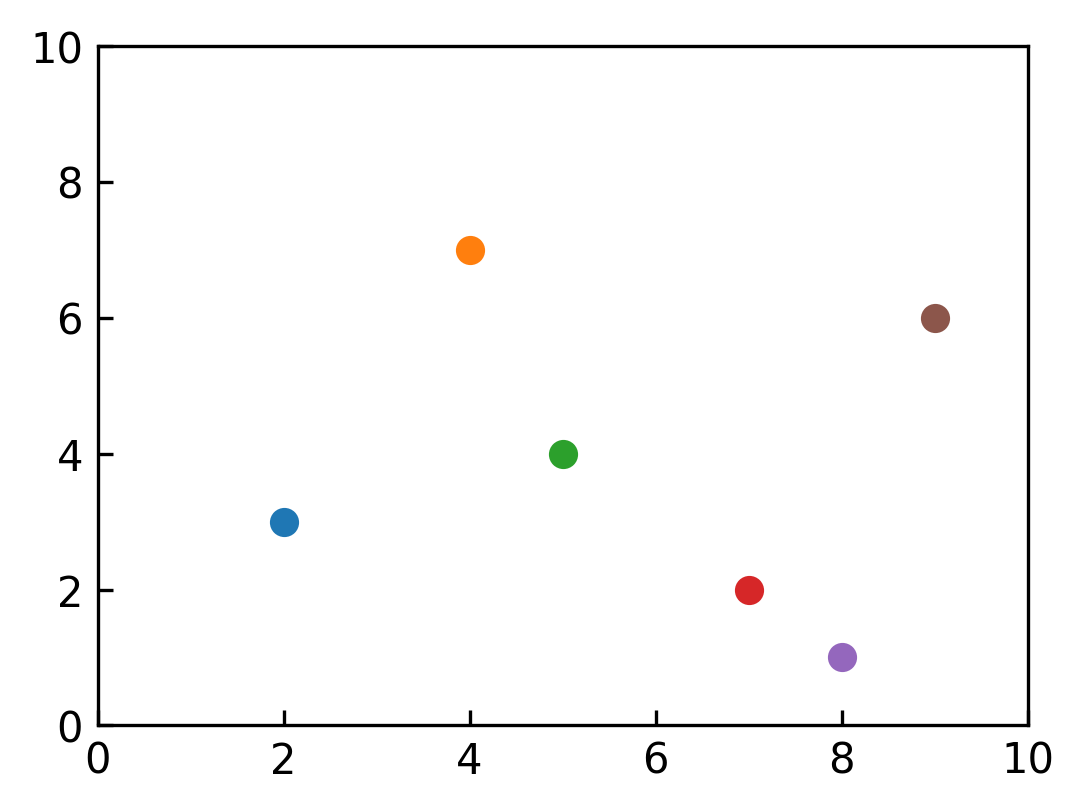

In [39]:
# data
plt.figure(figsize=(4, 3), dpi = 300)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(data[0][0], data[0][1])
plt.scatter(data[1][0], data[1][1])
plt.scatter(data[2][0], data[2][1])
plt.scatter(data[3][0], data[3][1])
plt.scatter(data[4][0], data[4][1])
plt.scatter(data[5][0], data[5][1])

plt.xlim([0, 10])
plt.ylim([0, 10])

plt.show()

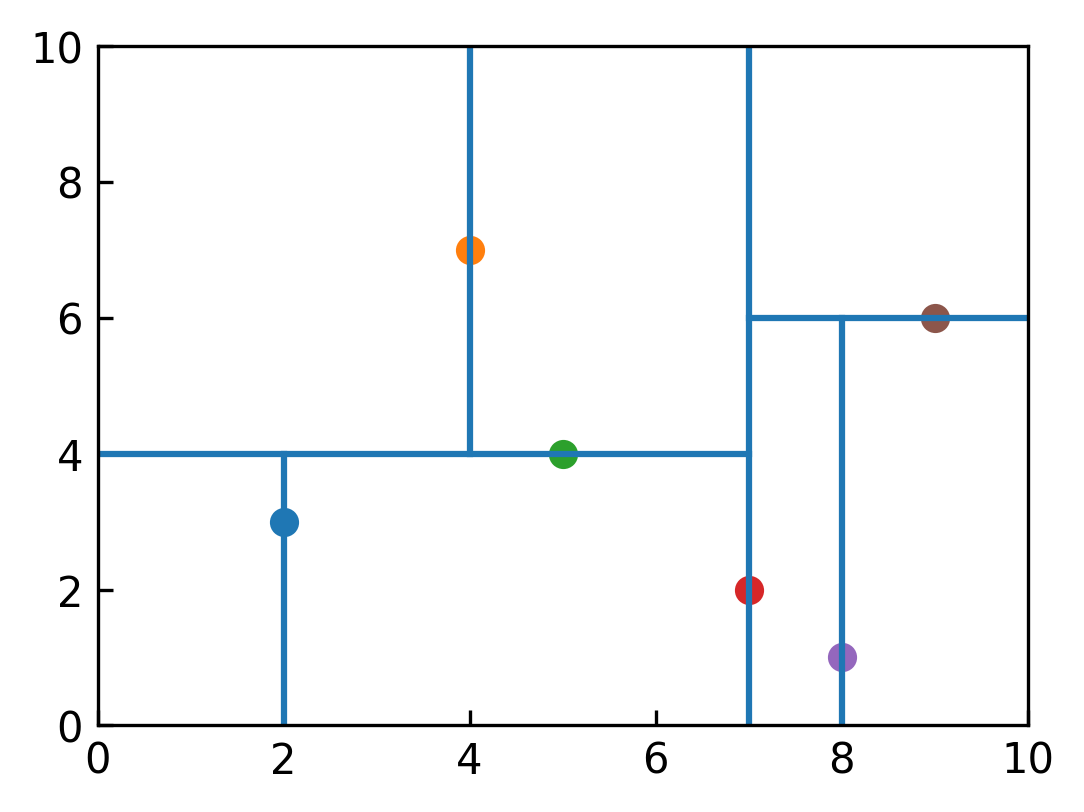

In [40]:
# kd tree [7, 2]  [5, 4]  [2, 3]  [4, 7]  [9, 6]   [8, 1] 特征空间划分
plt.figure(figsize=(4, 3), dpi = 300)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(data[0][0], data[0][1])
plt.scatter(data[1][0], data[1][1])
plt.scatter(data[2][0], data[2][1])
plt.scatter(data[3][0], data[3][1])
plt.scatter(data[4][0], data[4][1])
plt.scatter(data[5][0], data[5][1])


plt.axvline(x = 2, ymin = 0, ymax = 0.4)
plt.axvline(x = 4, ymin = 0.4, ymax = 1)
plt.axvline(x = 7)
plt.axvline(x = 8, ymin = 0, ymax = 0.6)

plt.axhline(y = 4, xmin = 0, xmax = 0.7)
plt.axhline(y = 6, xmin = 0.7, xmax = 1)

plt.xlim([0, 10])
plt.ylim([0, 10])

plt.show()